#**Linear Regression using Gradient Descent**

### This notebook demonstrates linear regression by minimizing the Mean Squared Error (MSE) loss using gradient descent. We will:
 1. Generate a synthetic 2D dataset with noise
 2. Implement gradient descent optimization
 3. Visualize the results and loss curve
 4. Plot the regression plane

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

# **Dataset Generation**
### We create a synthetic dataset with:
 - 1000 samples (`P`)
 - 2 input features (`X`)
 - Linear relationship with predefined coefficients (`true_e`)
 - Gaussian noise added to outputs

In [5]:
# Dataset parameters
P = 1000               # Number of samples
noise_level = 2        # Standard deviation of noise
offset = 2             # Shift input features
true_e = np.array([-4, 3, -7])

# Generate input features (P x 2 matrix)
X = np.random.randn(P, 2) + offset

# Create design matrix with bias term (add column of ones)
U = np.column_stack((np.ones(P), X))

# Generate target values with added noise
y = U @ true_e + noise_level * np.random.randn(P)

print("True coefficients:")
print(true_e)

True coefficients:
[-4  3 -7]


# **Data Visualization**

 3D scatter plot showing the original data distribution



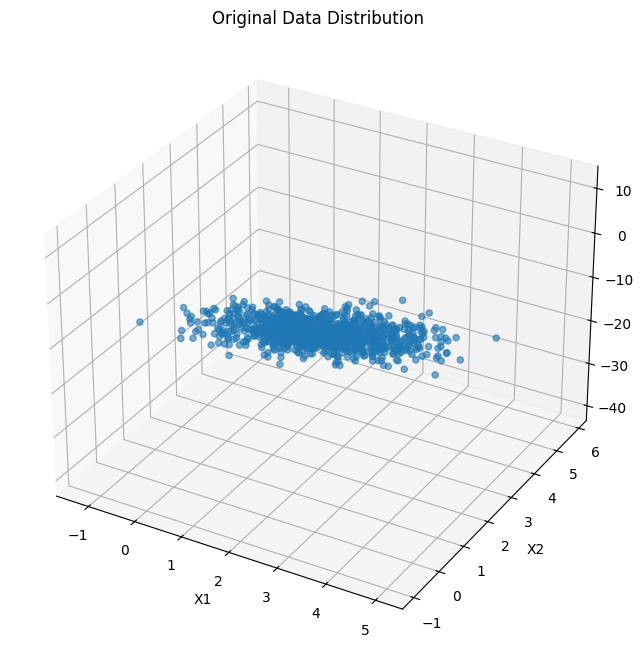

In [6]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original data
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.6)

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Original Data Distribution')

# Save axis limits for plane plotting
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.show()


# **Gradient Descent Implementation**

## Key components:
 - **MSE Loss**: $J(\mathbf{e}) = \frac{1}{2N} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^2$
 - **Gradient**: $\nabla J = \frac{1}{N} \mathbf{U}^T (\mathbf{\hat{y}} - \mathbf{y})$
 - **Update Rule**: $\mathbf{e} \leftarrow \mathbf{e} - \eta \nabla J$

In [7]:
def lin_regr_assuming_MSE_and_using_GD(U, y, eta, iterations):
    """
    Performs linear regression using gradient descent to minimize MSE loss.

    Parameters:
    U : ndarray (N x D+1)
        Design matrix with bias term
    y : ndarray (N,)
        Target values
    eta : float
        Learning rate
    iterations : int
        Number of gradient descent iterations

    Returns:
    e : ndarray (D+1,)
        Optimized coefficient vector [bias, w1, ..., wD]
    MSE_loss : ndarray (iterations,)
        Loss values during training
    """
    N = U.shape[0]          # Number of samples
    e = np.zeros(U.shape[1]) # Initialize coefficients
    MSE_loss = np.zeros(iterations)

    for j in range(iterations):
        # Compute predictions
        y_pred = U @ e

        # Calculate MSE loss
        MSE_loss[j] = np.sum((y_pred - y)**2) / (2 * N)

        # Compute gradient
        gradient = U.T @ (y_pred - y) / N

        # Update coefficients
        e -= eta * gradient

    return e, MSE_loss



# **Model Training**
## Hyperparameters:
- Learning rate (`eta`): 0.1
- Iterations: 1000

In [8]:
# Training parameters
eta = 0.1
iterations = 1000

# Train model
e, MSE_loss = lin_regr_assuming_MSE_and_using_GD(U, y, eta, iterations)

# Display results
print("\nFitted coefficients:")
print(e)


Fitted coefficients:
[-4.17158399  3.0554834  -6.96574352]


# **Results Visualization**

## 1. Loss Curve
Shows MSE reduction during training

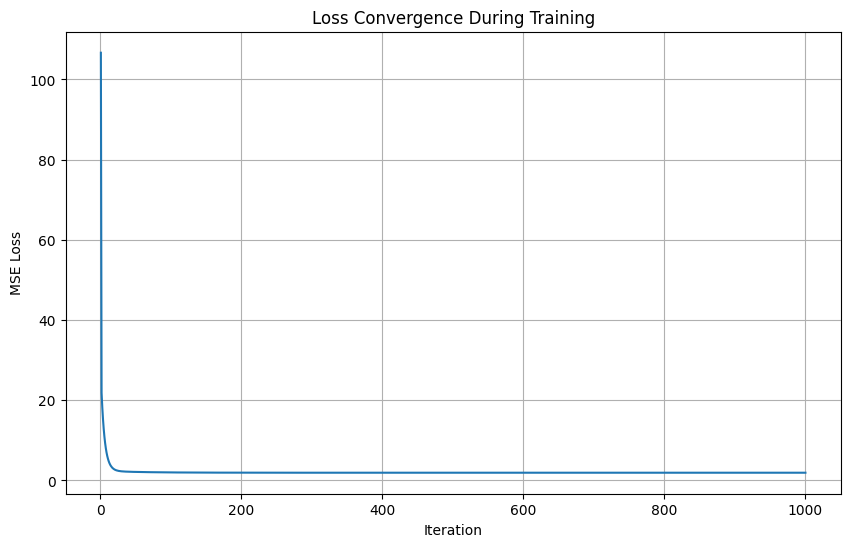

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations+1), MSE_loss)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss Convergence During Training')
plt.grid(True)
plt.show()


## 2. Data vs. Predictions
 Compares original data with model predictions

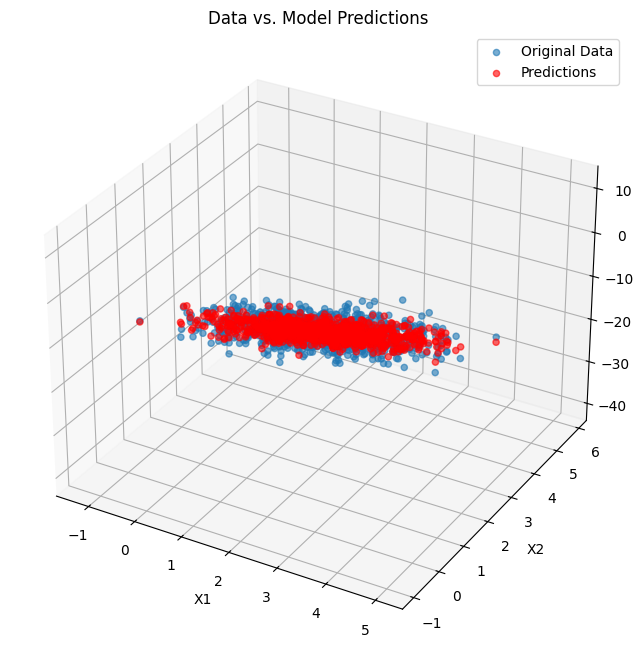

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original data
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.6, label='Original Data')

# Model predictions
y_pred = U @ e
ax.scatter(X[:, 0], X[:, 1], y_pred, c='r', alpha=0.6, label='Predictions')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Data vs. Model Predictions')
ax.legend()

plt.show()

## 3. Regression Plane
Visualizes the learned linear decision boundary

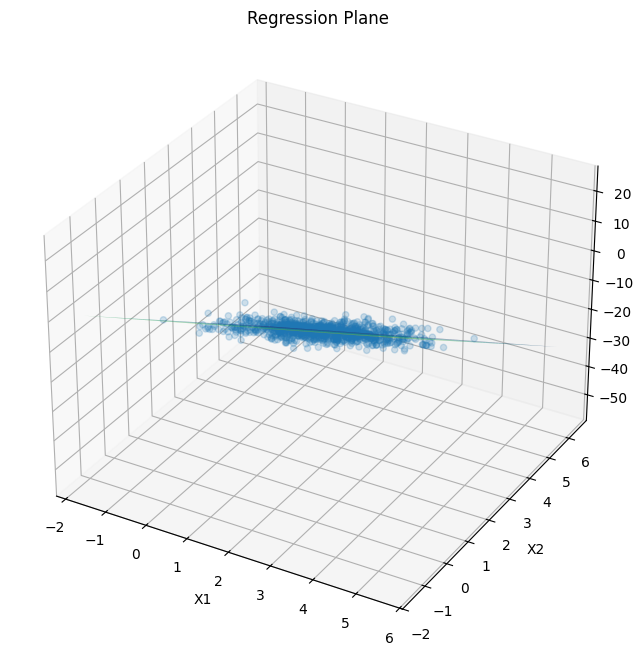

In [11]:
# Create grid for surface plotting
x1_grid, x2_grid = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),
    np.linspace(ylim[0], ylim[1], 50)
)

# Compute predicted values on grid
z_grid = e[0] + e[1]*x1_grid + e[2]*x2_grid

# Create plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(x1_grid, x2_grid, z_grid, alpha=0.5, cmap='viridis',
                edgecolor='none', label='Regression Plane')

# Plot original data for reference
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.2)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Regression Plane')

plt.show()
